#### **🧭 Stage 1 → Lesson 10: Foundation Project — “People & Family Insights Dashboard”**

**🎯 Project Objective**

Build a complete end-to-end Pandas workflow:

- Load raw messy data
- Clean missing values
- Convert data types
- Apply indexing & filtering
- Create derived columns
- Aggregate insights
- Create pivot-like views
- Export cleaned data
- Visualize basic insights

***🧱 Step 1 — Load Data***

In [140]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\dhira\Desktop\python-mastery\pandas\dataset\raw\family_ages.csv")
df.head()


,Name,Age,Relation,City,Salary
0,Dhiraj,36,Father,Delhi,6834.0
1,Pooja,34,Mother,Gujrat,9303.0
2,Aarav,12,Brother,Noida,NaN
3,Ananya,10,Sister,Gurgaon,7756.0
4,Rahul,40,Uncle,Bangalore,8470.0


***🧩 Step 2 — Inspect Data Structure***

In [141]:
df.info()
print("\nDescribe Data")
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      8 non-null      object 
 1   Age       8 non-null      int64  
 2   Relation  8 non-null      object 
 3   City      8 non-null      object 
 4   Salary    6 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 452.0+ bytes

Describe Data


Name        0
Age         0
Relation    0
City        0
Salary      2
dtype: int64

**🧩 Step 3 — Clean Missing Values**
- Replace empty salary or age with correct values

In [142]:
print("original data:\n",df)

# Convert the 'Salary' column in the DataFrame 'df' to a numeric type (e.g., float or int).
# If there are any non-numeric values, they will be converted to NaN.
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Similarly, convert the 'Age' column to numeric type.
# Non-numeric values in 'Age' will be turned into NaN as well.
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill NaN values in the 'Salary' column with the median of the column.
# The median is used as it is less sensitive to outliers than the mean.
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Fill NaN values in the 'Age' column with the mean of the column.
# The mean is a common way to handle missing values for numerical columns.
df['Age'] = df['Age'].fillna(df['Age'].mean())

original data:
      Name  Age  Relation       City  Salary
0  Dhiraj   36    Father      Delhi  6834.0
1   Pooja   34    Mother     Gujrat  9303.0
2   Aarav   12   Brother      Noida     NaN
3  Ananya   10    Sister    Gurgaon  7756.0
4   Rahul   40     Uncle  Bangalore  8470.0
5   Nisha   38  Daughter       Pune     NaN
6   Rohan   28       Son      Noida  6893.0
7    Isha   26  Daughter      Delhi  7696.0


**🧩 Step 4 — Fix Text Data**

In [143]:
# Replace empty strings with NaN
df['City'] = df['City'].replace('', np.nan)

# Fill NaN values with 'Unknown'
df['City'] = df['City'].fillna('Unknown')

# Convert Relation column to title case
df['Relation'] = df['Relation'].str.title()
df

,Name,Age,Relation,City,Salary
0,Dhiraj,36,Father,Delhi,6834.0
1,Pooja,34,Mother,Gujrat,9303.0
2,Aarav,12,Brother,Noida,7726.0
3,Ananya,10,Sister,Gurgaon,7756.0
4,Rahul,40,Uncle,Bangalore,8470.0
5,Nisha,38,Daughter,Pune,7726.0
6,Rohan,28,Son,Noida,6893.0
7,Isha,26,Daughter,Delhi,7696.0


**🧩 Step 5 — Set Index for Clean Access**

In [144]:
# Set the 'Name' column as the index of the DataFrame.
# inplace=True modifies the original DataFrame directly.
df.set_index('Name', inplace=True)

# Display the DataFrame with the new index.
df

,Age,Relation,City,Salary
Name,,,,
Dhiraj,36,Father,Delhi,6834.0
Pooja,34,Mother,Gujrat,9303.0
Aarav,12,Brother,Noida,7726.0
Ananya,10,Sister,Gurgaon,7756.0
Rahul,40,Uncle,Bangalore,8470.0
Nisha,38,Daughter,Pune,7726.0
Rohan,28,Son,Noida,6893.0
Isha,26,Daughter,Delhi,7696.0


**🧩 Step 6 — Add Derived Columns**

In [145]:
df['AgeGroup'] = pd.cut(
    df['Age'],                 # Column to categorize
    bins=[0, 18, 40, 60],      # Age ranges (0–18, 18–40, 40–60)
    labels=['Child',           # Label for 0 < Age ≤ 18
            'Adult',           # Label for 18 < Age ≤ 40
            'Middle Age']      # Label for 40 < Age ≤ 60
)
df

,Age,Relation,City,Salary,AgeGroup
Name,,,,,
Dhiraj,36,Father,Delhi,6834.0,Adult
Pooja,34,Mother,Gujrat,9303.0,Adult
Aarav,12,Brother,Noida,7726.0,Child
Ananya,10,Sister,Gurgaon,7756.0,Child
Rahul,40,Uncle,Bangalore,8470.0,Adult
Nisha,38,Daughter,Pune,7726.0,Adult
Rohan,28,Son,Noida,6893.0,Adult
Isha,26,Daughter,Delhi,7696.0,Adult


In [146]:
# Convert Salary from local currency (e.g., INR) to USD by dividing by 83,
# then round the result to 2 decimal places and store it in a new column.
df['Salary_USD'] = (df['Salary'] / 83).round(2)

# Display the updated DataFrame
df

,Age,Relation,City,Salary,AgeGroup,Salary_USD
Name,,,,,,
Dhiraj,36,Father,Delhi,6834.0,Adult,82.34
Pooja,34,Mother,Gujrat,9303.0,Adult,112.08
Aarav,12,Brother,Noida,7726.0,Child,93.08
Ananya,10,Sister,Gurgaon,7756.0,Child,93.45
Rahul,40,Uncle,Bangalore,8470.0,Adult,102.05
Nisha,38,Daughter,Pune,7726.0,Adult,93.08
Rohan,28,Son,Noida,6893.0,Adult,83.05
Isha,26,Daughter,Delhi,7696.0,Adult,92.72


**🧩 Step 7 — Apply Filtering (Business Logic)**
- Adults earning more than ₹1 lakh

In [147]:
print("original_data:\n",df)

# Filter the DataFrame to include only rows where:
# 1) Age is greater than 18
# 2) Salary is greater than 10,000
high_earners = df[(df['Age'] > 28) & (df['Salary'] >= 5000)]

# Display the filtered DataFrame containing high-earning adults
high_earners

original_data:
         Age  Relation       City  Salary AgeGroup  Salary_USD
Name                                                         
Dhiraj   36    Father      Delhi  6834.0    Adult       82.34
Pooja    34    Mother     Gujrat  9303.0    Adult      112.08
Aarav    12   Brother      Noida  7726.0    Child       93.08
Ananya   10    Sister    Gurgaon  7756.0    Child       93.45
Rahul    40     Uncle  Bangalore  8470.0    Adult      102.05
Nisha    38  Daughter       Pune  7726.0    Adult       93.08
Rohan    28       Son      Noida  6893.0    Adult       83.05
Isha     26  Daughter      Delhi  7696.0    Adult       92.72


,Age,Relation,City,Salary,AgeGroup,Salary_USD
Name,,,,,,
Dhiraj,36,Father,Delhi,6834.0,Adult,82.34
Pooja,34,Mother,Gujrat,9303.0,Adult,112.08
Rahul,40,Uncle,Bangalore,8470.0,Adult,102.05
Nisha,38,Daughter,Pune,7726.0,Adult,93.08


**People living in Delhi or Mumbai**

In [148]:
# Filter the DataFrame to include only rows where the City is either 'Delhi' or 'Mumbai'
metro = df[df['City'].isin(['Delhi', 'Mumbai'])]

# Display the filtered DataFrame containing only metro city records
metro

,Age,Relation,City,Salary,AgeGroup,Salary_USD
Name,,,,,,
Dhiraj,36,Father,Delhi,6834.0,Adult,82.34
Isha,26,Daughter,Delhi,7696.0,Adult,92.72


**🧩 Step 8 — Aggregations (Important Insight Step)**

Total Salary by City

In [149]:
# Group the DataFrame by 'City' and calculate the total Salary for each city
salary_by_city = df.groupby('City')['Salary'].sum()

# Display the total salary per city
salary_by_city

City
Bangalore     8470.0
Delhi        14530.0
Gujrat        9303.0
Gurgaon       7756.0
Noida        14619.0
Pune          7726.0
Name: Salary, dtype: float64

Average age by Relation

In [150]:
age_by_relation = df.groupby('Relation')['Age'].mean()
print(age_by_relation)

Relation
Brother     12.0
Daughter    32.0
Father      36.0
Mother      34.0
Sister      10.0
Son         28.0
Uncle       40.0
Name: Age, dtype: float64


Count of family members per AgeGroup

In [151]:
# Count the number of occurrences of each category in the 'AgeGroup' column
age_group_counts = df['AgeGroup'].value_counts()

# Print the counts of each age group
print(age_group_counts)

AgeGroup
Adult         6
Child         2
Middle Age    0
Name: count, dtype: int64


Pivot Table: Salary by City & Relation

In [152]:
# Create a pivot table showing the average Salary for each combination of City and Relation
pivot_salary = df.pivot_table(
    values='Salary',       # Column to aggregate
    index='City',          # Rows: each unique City
    columns='Relation',    # Columns: each unique Relation
    aggfunc='mean',        # Aggregation function: calculate the mean Salary
    fill_value=0           # Replace missing values with 0
)

# Display the pivot table
pivot_salary


Relation,Brother,Daughter,Father,Mother,Sister,Son,Uncle
City,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,8470.0
Delhi,0.0,7696.0,6834.0,0.0,0.0,0.0,0.0
Gujrat,0.0,0.0,0.0,9303.0,0.0,0.0,0.0
Gurgaon,0.0,0.0,0.0,0.0,7756.0,0.0,0.0
Noida,7726.0,0.0,0.0,0.0,0.0,6893.0,0.0
Pune,0.0,7726.0,0.0,0.0,0.0,0.0,0.0


**🧩 Step 9 — Quick Visualizations**

Age distribution

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

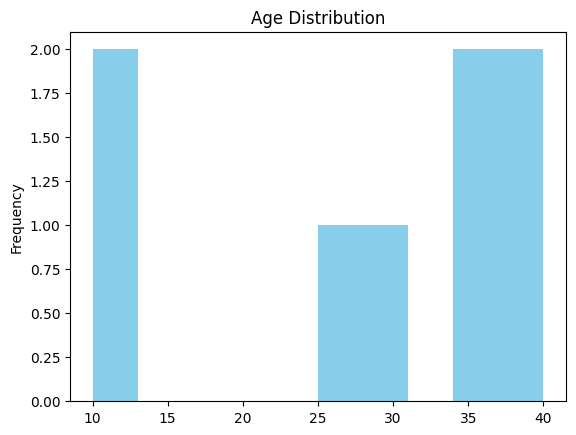

In [154]:
# Plot a histogram of the 'Age' column
df['Age'].plot(
    kind='hist',          # Type of plot: histogram
    title='Age Distribution',  # Title of the plot
    color='skyblue'       # Color of the bars
)

Salary by City

<Axes: title={'center': 'Total Salary by City'}, xlabel='City'>

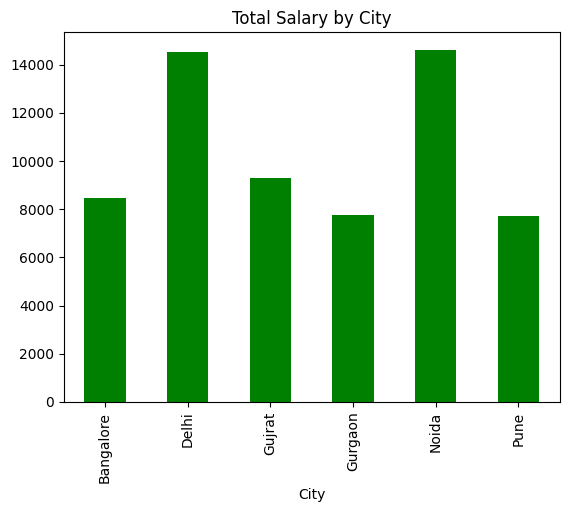

In [158]:
# Group the DataFrame by 'City' and sum the 'Salary' for each city
# Then plot the total salary per city as a bar chart
df.groupby('City')['Salary'].sum().plot(
    kind='bar',       # Type of plot: bar chart
    color='green',    # Color of the bars
    title='Total Salary by City'  # Title of the plot
)